<a href="https://colab.research.google.com/github/vorobieva/validate_de_novo_designed_proteins/blob/main/Code/Analyse_Fig1_and_Fig2A%2CB%2C_Fig3A%2CB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title Mount google drive
from google.colab import drive
drive.mount('/content/google_drive')

Mounted at /content/google_drive


In [ ]:
#@title Input protein sequence, then hit `Runtime` -> `Run all`

input_dataframe = '/content/google_drive/My Drive/AF_vs_ESMF/water_soluble_barrels/df.pckl' #@param {type:"string"}
input_dataframe2 = '/content/google_drive/My Drive/AF_vs_ESMF/water_soluble_barrels/df2.pckl' #@param {type:"string"}
input_dataframe3 = '/content/google_drive/My Drive/AF_vs_ESMF/water_soluble_barrels/df3.pckl' #@param {type:"string"}
input_dataframe4 = '/content/google_drive/My Drive/AF_vs_ESMF/water_soluble_barrels/df4.pckl' #@param {type:"string"}

input_AlphaFold = '/content/google_drive/My Drive/AF_vs_ESMF/water_soluble_barrels/dAF_F.pckl' #@param {type:"string"}
input_AlphaFold2 = '/content/google_drive/My Drive/AF_vs_ESMF/water_soluble_barrels/dAF_F2.pckl' #@param {type:"string"}
input_AlphaFold3 = '/content/google_drive/My Drive/AF_vs_ESMF/water_soluble_barrels/dAF_F3.pckl' #@param {type:"string"}



In [ ]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob
import json
import numpy as np
import pickle
from scipy.stats import mannwhitneyu, normaltest

%matplotlib inline

In [ ]:
df = pd.read_pickle(input_dataframe)
df2 = pd.read_pickle(input_dataframe2)
df3 = pd.read_pickle(input_dataframe3)
df4 = pd.read_pickle(input_dataframe4)
dAF_F = pd.read_pickle(input_AlphaFold)
dAF_F2 = pd.read_pickle(input_AlphaFold2)
dAF_F3 = pd.read_pickle(input_AlphaFold3)

In [ ]:
df_ss = df.loc[df["disulfide"].isin([0,-1])]
df2_ss = df2.loc[df2["disulfide"].isin([0,-1])]
df3_ss = df3.loc[df3["disulfide"].isin([0,-1])]
df4_ss = df4.loc[df4["disulfide"].isin([0,-1])]
dAF_ss = dAF_F.loc[dAF_F["disulfide"].isin([0,-1])]
dAF2_ss = dAF_F2.loc[dAF_F2["disulfide"].isin([0,-1])]
dAF3_ss = dAF_F3.loc[dAF_F3["disulfide"].isin([0,-1])]

In [ ]:
def permutation_test(dis1,dis2,n_permutations):
  n, k = len(dis1), 0
  diff = np.abs(np.mean(dis1) - np.mean(dis2))
  stats = np.zeros(n_permutations)
  all_dis = np.concatenate([dis1, dis2])
  for j in range(n_permutations):
    np.random.shuffle(all_dis)
    k += diff < np.abs(np.mean(all_dis[:n]) - np.mean(all_dis[n:]))
  p_value = k / n_permutations
  return(p_value)

In [ ]:
df4_ss

,model_1,model_2,model_3,model_4,model_5,RMS_model_1,RMS_model_2,RMS_model_3,RMS_model_4,RMS_model_5,...,model_2,model_3,model_4,model_5,plDDT9_all,plDDT9_backbone,disulfide,expression,soluble,monomer
HBI_b_01,86.972072,84.004324,79.158829,76.187568,58.362883,0.94,1.04,1.44,1.31,2.05,...,80.89,64.10,76.54,56.34,86.951250,90.724,0,1,1,0
HBI_b_04,77.480000,74.106216,73.526306,69.598288,68.420090,1.33,2.70,2.51,2.76,2.82,...,73.05,69.52,60.70,66.71,86.272500,88.410,0,1,1,0
HBI_b_02,83.511171,83.025405,82.665586,57.644144,35.058288,1.50,1.68,1.60,2.07,4.58,...,72.70,76.65,58.49,36.06,78.860000,82.718,0,0,0,0
HBI_b_03,80.006847,76.458378,57.854955,57.199099,54.645676,1.97,2.78,2.63,2.94,2.08,...,74.41,57.01,56.69,60.61,87.034000,87.034,0,1,1,0
HBI_b_09,86.358378,85.859369,85.503784,85.346937,83.519369,1.26,1.14,1.05,1.25,1.19,...,69.60,77.47,78.90,62.25,77.365000,80.196,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Cb1_ffneg,79.099529,75.281647,72.749059,70.208941,60.268824,3.13,3.05,3.21,3.16,3.46,...,74.91,70.64,65.76,41.56,58.361111,60.742,0,1,2,2
Cb1_ffpos,80.374235,77.674941,76.264471,75.969176,71.836235,1.91,1.56,1.89,2.29,1.97,...,76.29,71.90,74.94,69.59,59.080000,62.504,0,1,2,2
Cb_short3,69.151279,66.617442,64.905930,58.456977,55.460930,2.29,2.34,2.51,2.49,1.82,...,59.86,59.16,57.74,48.84,43.470909,49.352,0,1,2,2
Cb_idff2,71.577857,68.410595,67.033690,66.821905,60.902500,2.26,1.31,1.58,2.97,1.68,...,57.82,57.79,56.73,49.69,43.876364,48.492,0,1,2,2


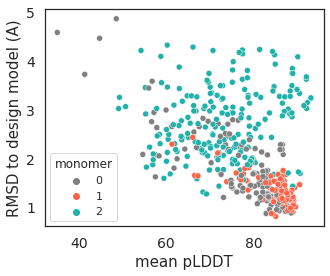

In [ ]:
sns.set(rc={'figure.figsize':(5,4)})
sns.set_style("white")
cols=['grey','tomato','lightseagreen']
ax = sns.scatterplot(data=df3_ss, x="model_1", y="RMS_model_1", hue="monomer", palette=cols)
ax = sns.scatterplot(data=df3_ss, x="model_2", y="RMS_model_2", hue="monomer", palette=cols, legend=None)
ax = sns.scatterplot(data=df3_ss, x="model_3", y="RMS_model_3", hue="monomer", palette=cols, legend=None)
ax = sns.scatterplot(data=df3_ss, x="model_4", y="RMS_model_4", hue="monomer", palette=cols, legend=None)
ax = sns.scatterplot(data=df3_ss, x="model_5", y="RMS_model_5", hue="monomer", palette=cols, legend=None)
ax.set_xlabel("mean pLDDT",fontsize=15)
ax.set_ylabel("RMSD to design model (A)",fontsize=15)
ax.tick_params(labelsize=14)

In [ ]:
df3_ss['mean_plDDT'] = df3_ss[['model_1', 'model_2','model_3','model_4','model_5']].mean(axis=1)
df3_ss['mean_plDDT_9'] = df3_ss[['model9_1', 'model9_2','model9_3','model9_4','model9_5']].mean(axis=1)
df3_ss['mean_RMSD'] = df3_ss[['RMS_model_1', 'RMS_model_2','RMS_model_3','RMS_model_4','RMS_model_5']].mean(axis=1)
df3_ss['std_plDDT'] = df3_ss[['model_1', 'model_2','model_3','model_4','model_5']].std(axis=1)
df3_ss['std_plDDT_9'] = df3_ss[['model9_1', 'model9_2','model9_3','model9_4','model9_5']].std(axis=1)
df3_ss['std_RMSD'] = df3_ss[['RMS_model_1', 'RMS_model_2','RMS_model_3','RMS_model_4','RMS_model_5']].std(axis=1)
df3_ss

<ipython-input-6-0fdb7e555b2f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3_ss['mean_plDDT'] = df3_ss[['model_1', 'model_2','model_3','model_4','model_5']].mean(axis=1)
<ipython-input-6-0fdb7e555b2f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3_ss['mean_plDDT_9'] = df3_ss[['model9_1', 'model9_2','model9_3','model9_4','model9_5']].mean(axis=1)
<ipython-input-6-0fdb7e555b2f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

,model_1,model_2,model_3,model_4,model_5,RMS_model_1,RMS_model_2,RMS_model_3,RMS_model_4,RMS_model_5,...,disulfide,expression,soluble,monomer,mean_plDDT,mean_plDDT_9,mean_RMSD,std_plDDT,std_plDDT_9,std_RMSD
HBI_b_01,86.972072,84.004324,79.158829,76.187568,58.362883,0.94,1.04,1.44,1.31,2.05,...,0,1,1,0,76.937135,72.470,1.356,11.193142,11.852586,0.436955
HBI_b_04,77.480000,74.106216,73.526306,69.598288,68.420090,1.33,2.70,2.51,2.76,2.82,...,0,1,1,0,72.626180,70.286,2.424,3.654436,7.706175,0.622519
HBI_b_02,83.511171,83.025405,82.665586,57.644144,35.058288,1.50,1.68,1.60,2.07,4.58,...,0,0,0,0,68.380919,62.748,2.286,21.639739,16.378219,1.300454
HBI_b_03,80.006847,76.458378,57.854955,57.199099,54.645676,1.97,2.78,2.63,2.94,2.08,...,0,1,1,0,65.232991,65.476,2.480,11.993188,10.322053,0.431335
HBI_b_09,86.358378,85.859369,85.503784,85.346937,83.519369,1.26,1.14,1.05,1.25,1.19,...,0,1,0,0,85.317568,71.812,1.178,1.077717,6.699296,0.086429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Cb1_ffneg,79.099529,75.281647,72.749059,70.208941,60.268824,3.13,3.05,3.21,3.16,3.46,...,0,1,2,2,71.521600,66.606,3.202,7.096085,14.974631,0.155467
Cb1_ffpos,80.374235,77.674941,76.264471,75.969176,71.836235,1.91,1.56,1.89,2.29,1.97,...,0,1,2,2,76.423812,75.398,1.924,3.100367,5.605504,0.259769
Cb_short3,69.151279,66.617442,64.905930,58.456977,55.460930,2.29,2.34,2.51,2.49,1.82,...,0,1,2,2,62.918512,57.514,2.290,5.744565,5.083265,0.279195
Cb_shortidl,84.106790,81.653086,77.667531,72.051111,68.170741,2.43,2.43,2.33,2.12,2.17,...,0,1,2,2,76.729852,83.412,2.296,6.608436,10.594875,0.144845


In [ ]:
df3_ss.to_csv("/content/google_drive/MyDrive/AF_vs_ESMF/csv_figure_1_updated.csv")

(30.0, 92.0)

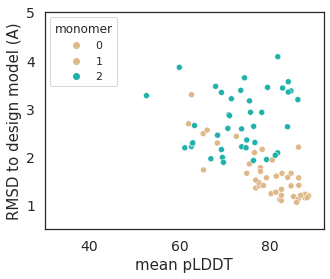

In [ ]:
sns.set(rc={'figure.figsize':(5,4)})
sns.set_style("white")
cols=['burlywood','burlywood','lightseagreen']
ax = sns.scatterplot(data=df3_ss, x="mean_plDDT", y="mean_RMSD", hue="monomer", palette=cols)
ax.set_xlabel("mean pLDDT",fontsize=15)
ax.set_ylabel("RMSD to design model (A)",fontsize=15)
ax.tick_params(labelsize=14)
#ax.legend(title='', loc='upper left', labels=['Misfolded','Correctly folded','Undesignable backbones (no expression/toxic)'])
plt.ylim(0.5, 5)
plt.xlim(30, 92)

In [ ]:
df3_ss.loc[df3_ss.index == 'HBI_b_10']

,model_1,model_2,model_3,model_4,model_5,RMS_model_1,RMS_model_2,RMS_model_3,RMS_model_4,RMS_model_5,...,disulfide,expression,soluble,monomer,mean_plDDT,mean_plDDT_9,mean_RMSD,std_plDDT,std_plDDT_9,std_RMSD
HBI_b_10,89.195495,88.344595,88.232162,87.575856,86.039279,1.13,1.14,1.16,1.16,1.16,...,0,1,1,1,87.877477,84.33,1.15,1.178041,1.875886,0.014142


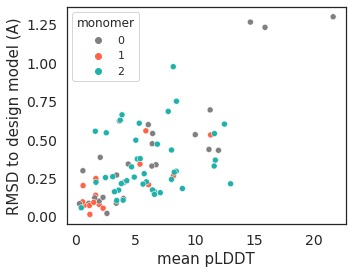

In [ ]:
sns.set(rc={'figure.figsize':(5,4)})
sns.set_style("white")
cols=['grey','tomato','lightseagreen']
ax = sns.scatterplot(data=df3_ss, x="std_plDDT", y="std_RMSD", hue="monomer", palette=cols)
ax.set_xlabel("mean pLDDT",fontsize=15)
ax.set_ylabel("RMSD to design model (A)",fontsize=15)
ax.tick_params(labelsize=14)
#plt.ylim(0.5, 5)
#plt.xlim(30, 92)

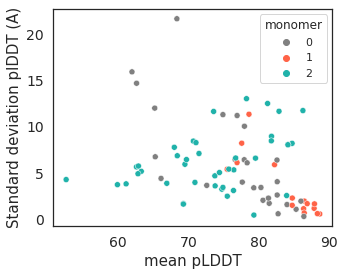

In [ ]:
sns.set(rc={'figure.figsize':(5,4)})
sns.set_style("white")
cols=['grey','tomato','lightseagreen']
ax = sns.scatterplot(data=df3_ss, x="mean_plDDT", y="std_plDDT", hue="monomer", palette=cols)
ax.set_xlabel("mean pLDDT",fontsize=15)
ax.set_ylabel("Standard deviation plDDT (A)",fontsize=15)
ax.tick_params(labelsize=14)
#plt.ylim(0.5, 5)
#plt.xlim(30, 92)

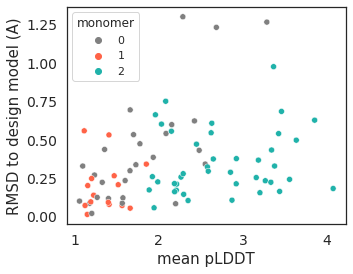

In [ ]:
sns.set(rc={'figure.figsize':(5,4)})
sns.set_style("white")
cols=['grey','tomato','lightseagreen']
ax = sns.scatterplot(data=df3_ss, x="mean_RMSD", y="std_RMSD", hue="monomer", palette=cols)
ax.set_xlabel("mean pLDDT",fontsize=15)
ax.set_ylabel("RMSD to design model (A)",fontsize=15)
ax.tick_params(labelsize=14)
#plt.ylim(0.5, 5)
#plt.xlim(30, 92)

(30.0, 92.0)

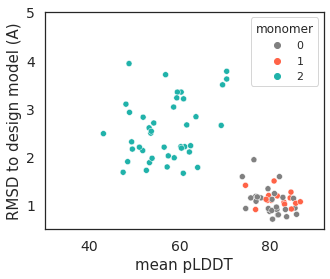

In [ ]:
sns.set(rc={'figure.figsize':(5,4)})
sns.set_style("white")
cols=['grey','tomato','lightseagreen']
ax = sns.scatterplot(data=df3_ss, x="plDDT_all", y="RMS_ESM", hue="monomer", palette=cols)
ax.set_xlabel("mean pLDDT",fontsize=15)
ax.set_ylabel("RMSD to design model (A)",fontsize=15)
ax.tick_params(labelsize=14)
plt.ylim(0.5, 5)
plt.xlim(30, 92)

(30.0, 92.0)

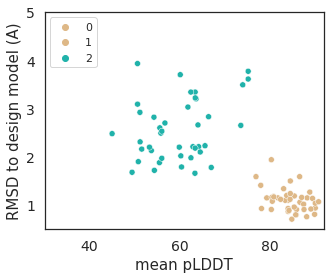

In [ ]:
sns.set(rc={'figure.figsize':(5,4)})
sns.set_style("white")
cols=['burlywood','burlywood','lightseagreen']
ax = sns.scatterplot(data=df3_ss, x="plDDT_backbone", y="RMS_ESM", hue="monomer", palette=cols)
ax.set_xlabel("mean pLDDT",fontsize=15)
ax.set_ylabel("RMSD to design model (A)",fontsize=15)
ax.tick_params(labelsize=14)
plt.legend(loc="upper left")
plt.ylim(0.5, 5)
plt.xlim(30, 92)

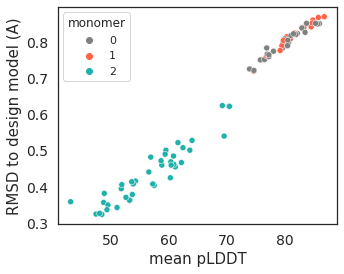

In [ ]:
sns.set(rc={'figure.figsize':(5,4)})
sns.set_style("white")
cols=['grey','tomato','lightseagreen']
ax = sns.scatterplot(data=df4_ss, x="plDDT_all", y="ptm", hue="monomer", palette=cols)
ax.set_xlabel("mean pLDDT",fontsize=15)
ax.set_ylabel("RMSD to design model (A)",fontsize=15)
ax.tick_params(labelsize=14)
#plt.ylim(0.5, 5)
#plt.xlim(30, 92)

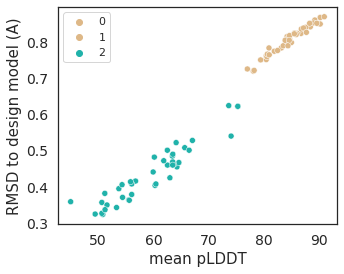

In [ ]:
sns.set(rc={'figure.figsize':(5,4)})
sns.set_style("white")
cols=['burlywood','burlywood','lightseagreen']
ax = sns.scatterplot(data=df4_ss, x="plDDT_backbone", y="ptm", hue="monomer", palette=cols)
ax.set_xlabel("mean pLDDT",fontsize=15)
ax.set_ylabel("RMSD to design model (A)",fontsize=15)
ax.tick_params(labelsize=14)
plt.legend(loc="upper left")
#plt.ylim(0.5, 5)
#plt.xlim(30, 92)

In [ ]:
df5 = df4_ss[df4_ss.index.str.startswith('HBI_b_')]
#df5.to_csv("/content/google_drive/MyDrive/AF_vs_ESMF/csv_figure_3AB_updated.csv")

In [ ]:
sns.set(rc={'figure.figsize':(5,4)})
sns.set_style("white")
cols=['grey','tomato']
#ax = sns.scatterplot(data=df4, x="model9_1", y="RMS_model_1", hue="monomer", palette=cols)
#ax = sns.scatterplot(data=df4, x="model9_2", y="RMS_model_2", hue="monomer", palette=cols, legend=None)
#ax = sns.scatterplot(data=df4, x="model9_3", y="RMS_model_3", hue="monomer", palette=cols, legend=None)
ax = sns.scatterplot(data=df4, x="model9_4", y="RMS_model_4", hue="monomer", palette=cols, legend=None)
#ax = sns.scatterplot(data=df4, x="model9_5", y="RMS_model_5", hue="monomer", palette=cols, legend=None)
ax.set_xlabel("mean pLDDT",fontsize=15)
ax.set_ylabel("RMSD to design model (A)",fontsize=15)
ax.tick_params(labelsize=14)

ValueError: ignored

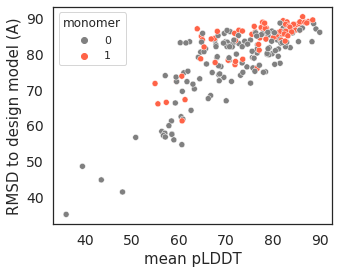

In [ ]:
sns.set(rc={'figure.figsize':(5,4)})
sns.set_style("white")
cols=['grey','tomato']
ax = sns.scatterplot(data=dAF2_ss, x="plDDT_9", y="plDDT", hue="monomer", palette=cols)
ax.set_xlabel("mean pLDDT",fontsize=15)
ax.set_ylabel("RMSD to design model (A)",fontsize=15)
ax.tick_params(labelsize=14)

In [ ]:
#dAF2_ss.groupby(level=0)['RMSD'].min()
#dbest_plDDT = dAF2_ss.sort_values("plDDT").groupby(level=0).last()
dbest_plDDT = dAF2_ss.sort_values("plDDT").groupby(level=0).nth(0)
dmean_plDDT = dAF2_ss.groupby(level=0).mean()
dmean_plDDT

,disulfide,expression,soluble,monomer,plDDT,RMSD,plDDT_9
design,,,,,,,
HBI_b_01,0.0,1.0,1.0,0.0,76.937135,1.356,72.470
HBI_b_02,0.0,0.0,0.0,0.0,68.380919,2.286,62.748
HBI_b_03,0.0,1.0,1.0,0.0,65.232991,2.480,65.476
HBI_b_04,0.0,1.0,1.0,0.0,72.626180,2.424,70.286
HBI_b_07,0.0,1.0,1.0,1.0,86.386505,1.124,77.400
HBI_b_08,-1.0,1.0,1.0,0.0,77.952180,1.776,71.060
HBI_b_09,0.0,1.0,0.0,0.0,85.317568,1.178,71.812
HBI_b_10,0.0,1.0,1.0,1.0,87.877477,1.150,84.330
HBI_b_13,0.0,1.0,1.0,0.0,80.613604,1.934,74.440


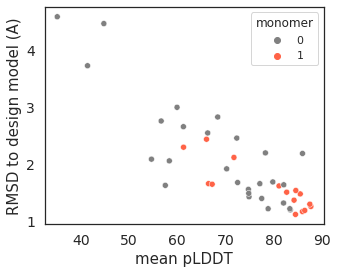

In [ ]:
sns.set(rc={'figure.figsize':(5,4)})
sns.set_style("white")
cols=['grey','tomato']
ax = sns.scatterplot(data=dbest_plDDT, x="plDDT", y="RMSD", hue="monomer", palette=cols)
ax.set_xlabel("mean pLDDT",fontsize=15)
ax.set_ylabel("RMSD to design model (A)",fontsize=15)
ax.tick_params(labelsize=14)

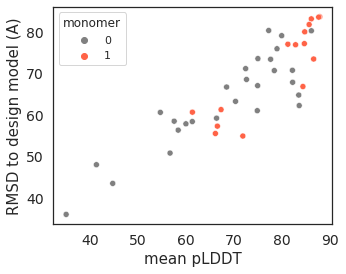

In [ ]:
sns.set(rc={'figure.figsize':(5,4)})
sns.set_style("white")
cols=['grey','tomato']
ax = sns.scatterplot(data=dbest_plDDT, x="plDDT", y="plDDT_9", hue="monomer", palette=cols)
ax.set_xlabel("mean pLDDT",fontsize=15)
ax.set_ylabel("RMSD to design model (A)",fontsize=15)
ax.tick_params(labelsize=14)

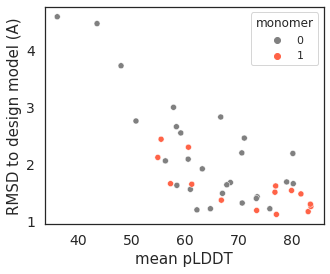

In [ ]:
sns.set(rc={'figure.figsize':(5,4)})
sns.set_style("white")
cols=['grey','tomato']
ax = sns.scatterplot(data=dbest_plDDT, x="plDDT_9", y="RMSD", hue="monomer", palette=cols)
ax.set_xlabel("mean pLDDT",fontsize=15)
ax.set_ylabel("RMSD to design model (A)",fontsize=15)
ax.tick_params(labelsize=14)

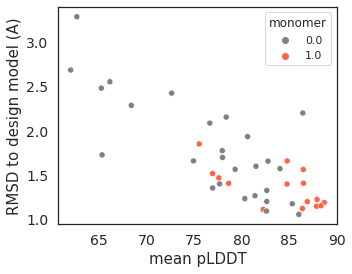

In [ ]:
sns.set(rc={'figure.figsize':(5,4)})
sns.set_style("white")
cols=['grey','tomato']
ax = sns.scatterplot(data=dmean_plDDT, x="plDDT", y="RMSD", hue="monomer", palette=cols)
ax.set_xlabel("mean pLDDT",fontsize=15)
ax.set_ylabel("RMSD to design model (A)",fontsize=15)
ax.tick_params(labelsize=14)

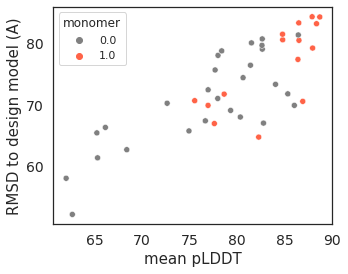

In [ ]:
sns.set(rc={'figure.figsize':(5,4)})
sns.set_style("white")
cols=['grey','tomato']
ax = sns.scatterplot(data=dmean_plDDT, x="plDDT", y="plDDT_9", hue="monomer", palette=cols)
ax.set_xlabel("mean pLDDT",fontsize=15)
ax.set_ylabel("RMSD to design model (A)",fontsize=15)
ax.tick_params(labelsize=14)

In [ ]:
dbest_RMSD = dAF2_ss.sort_values("RMSD").groupby(level=0).nth(4)
dbest_RMSD

,disulfide,expression,soluble,monomer,plDDT,RMSD,plDDT_9
design,,,,,,,
HBI_b_01,0,1,1,0,58.362883,2.05,56.34
HBI_b_02,0,0,0,0,35.058288,4.58,36.06
HBI_b_03,0,1,1,0,57.199099,2.94,56.69
HBI_b_04,0,1,1,0,68.420090,2.82,66.71
HBI_b_07,0,1,1,1,86.293153,1.22,77.84
HBI_b_08,-1,1,1,0,76.185045,2.24,75.68
HBI_b_09,0,1,0,0,86.358378,1.26,70.84
HBI_b_10,0,1,1,1,86.039279,1.16,83.11
HBI_b_13,0,1,1,0,80.351441,2.20,76.57


(22.0, 95.0)

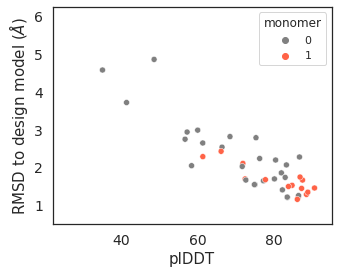

In [ ]:
sns.set(rc={'figure.figsize':(5,4)})
sns.set_style("white")
cols=['grey','tomato']
ax = sns.scatterplot(data=dbest_RMSD, x="plDDT", y="RMSD", hue="monomer", palette=cols)
ax.set_xlabel("plDDT",fontsize=15)
ax.set_ylabel("RMSD to design model ($\AA$)",fontsize=15)
ax.tick_params(labelsize=14)
plt.ylim(0.5, 6.25)
plt.xlim(22, 95)

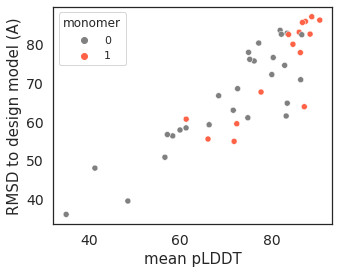

In [ ]:
sns.set(rc={'figure.figsize':(5,4)})
sns.set_style("white")
cols=['grey','tomato']
ax = sns.scatterplot(data=dbest_RMSD, x="plDDT", y="plDDT_9", hue="monomer", palette=cols)
ax.set_xlabel("mean pLDDT",fontsize=15)
ax.set_ylabel("RMSD to design model (A)",fontsize=15)
ax.tick_params(labelsize=14)

In [ ]:
dbest_plDDT9 = dAF2_ss.sort_values("plDDT_9").groupby(level=0).nth(0)
dbest_plDDT9

,disulfide,expression,soluble,monomer,plDDT,RMSD,plDDT_9
design,,,,,,,
HBI_b_01,0,1,1,0,58.362883,2.05,56.34
HBI_b_02,0,0,0,0,35.058288,4.58,36.06
HBI_b_03,0,1,1,0,57.199099,2.94,56.69
HBI_b_04,0,1,1,0,69.598288,2.76,60.70
HBI_b_07,0,1,1,1,86.334955,1.12,76.19
HBI_b_08,-1,1,1,0,70.281622,1.91,63.26
HBI_b_09,0,1,0,0,83.519369,1.19,62.25
HBI_b_10,0,1,1,1,88.232162,1.16,82.93
HBI_b_13,0,1,1,0,83.400450,1.29,70.24


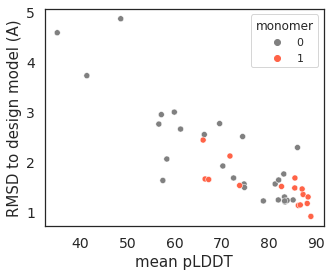

In [ ]:
sns.set(rc={'figure.figsize':(5,4)})
sns.set_style("white")
cols=['grey','tomato']
ax = sns.scatterplot(data=dbest_plDDT9, x="plDDT", y="RMSD", hue="monomer", palette=cols)
ax.set_xlabel("mean pLDDT",fontsize=15)
ax.set_ylabel("RMSD to design model (A)",fontsize=15)
ax.tick_params(labelsize=14)

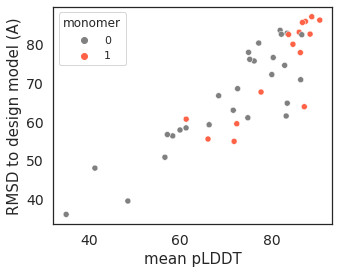

In [ ]:
sns.set(rc={'figure.figsize':(5,4)})
sns.set_style("white")
cols=['grey','tomato']
ax = sns.scatterplot(data=dbest_RMSD, x="plDDT", y="plDDT_9", hue="monomer", palette=cols)
ax.set_xlabel("mean pLDDT",fontsize=15)
ax.set_ylabel("RMSD to design model (A)",fontsize=15)
ax.tick_params(labelsize=14)

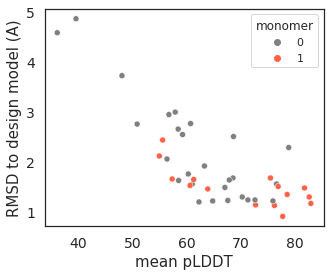

In [ ]:
sns.set(rc={'figure.figsize':(5,4)})
sns.set_style("white")
cols=['grey','tomato']
ax = sns.scatterplot(data=dbest_plDDT9, x="plDDT_9", y="RMSD", hue="monomer", palette=cols)
ax.set_xlabel("mean pLDDT",fontsize=15)
ax.set_ylabel("RMSD to design model (A)",fontsize=15)
ax.tick_params(labelsize=14)

(30.0, 92.0)

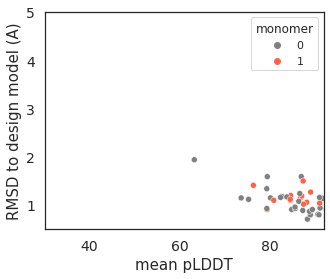

In [ ]:
sns.set(rc={'figure.figsize':(5,4)})
sns.set_style("white")
cols=['grey','tomato']
ax = sns.scatterplot(data=df3, x="plDDT9_backbone", y="RMS_ESM", hue="monomer", palette=cols)
ax.set_xlabel("mean pLDDT",fontsize=15)
ax.set_ylabel("RMSD to design model (A)",fontsize=15)
ax.tick_params(labelsize=14)
plt.ylim(0.5, 5)
plt.xlim(30, 92)

In [ ]:
dmean_AF = dAF_F.groupby(level=0).mean()

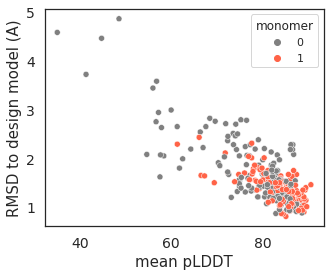

In [ ]:
sns.set(rc={'figure.figsize':(5,4)})
sns.set_style("white")
cols=['grey','tomato']
ax = sns.scatterplot(data=dAF_F, x="plDDT", y="RMSD", hue="monomer", palette=cols)
ax.set_xlabel("mean pLDDT",fontsize=15)
ax.set_ylabel("RMSD to design model (A)",fontsize=15)
ax.tick_params(labelsize=14)

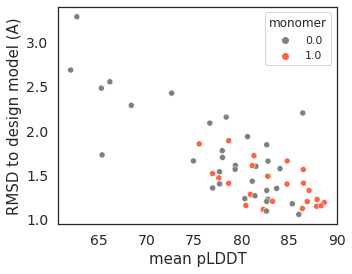

In [ ]:
sns.set(rc={'figure.figsize':(5,4)})
sns.set_style("white")
cols=['grey','tomato']
ax = sns.scatterplot(data=dmean_AF, x="plDDT", y="RMSD", hue="monomer", palette=cols)
ax.set_xlabel("mean pLDDT",fontsize=15)
ax.set_ylabel("RMSD to design model (A)",fontsize=15)
ax.tick_params(labelsize=14)

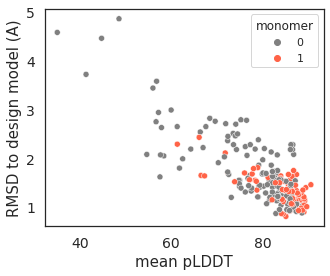

In [ ]:
sns.set(rc={'figure.figsize':(5,4)})
sns.set_style("white")
cols=['grey','tomato']
ax = sns.scatterplot(data=dAF3_ss, x="plDDT", y="RMSD", hue="monomer", palette=cols)
ax.set_xlabel("mean pLDDT",fontsize=15)
ax.set_ylabel("RMSD to design model (A)",fontsize=15)
ax.tick_params(labelsize=14)

(22.0, 95.0)

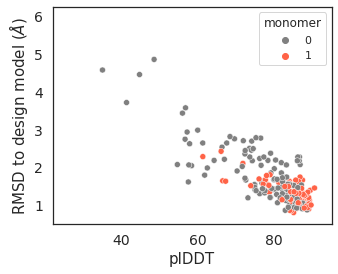

In [ ]:
sns.set(rc={'figure.figsize':(5,4)})
sns.set_style("white")
cols=['grey','tomato']
ax = sns.scatterplot(data=dAF3_ss, x="plDDT", y="RMSD", hue="monomer", palette=cols,legend=None)
ax.set_xlabel("plDDT",fontsize=15)
ax.set_ylabel("RMSD to design model ($\AA$)",fontsize=15)
ax.tick_params(labelsize=14)
plt.ylim(0.5, 6.25)
plt.xlim(22, 95)

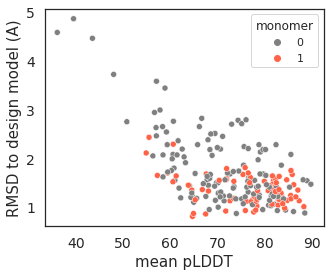

In [ ]:
sns.set(rc={'figure.figsize':(5,4)})
sns.set_style("white")
cols=['grey','tomato']
ax = sns.scatterplot(data=dAF3_ss, x="plDDT_9", y="RMSD", hue="monomer", palette=cols)
ax.set_xlabel("mean pLDDT",fontsize=15)
ax.set_ylabel("RMSD to design model (A)",fontsize=15)
ax.tick_params(labelsize=14)

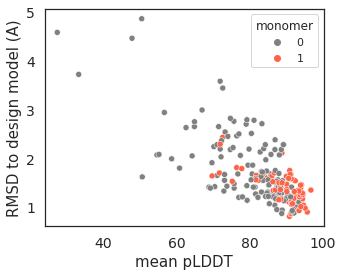

In [ ]:
sns.set(rc={'figure.figsize':(5,4)})
sns.set_style("white")
cols=['grey','tomato']
ax = sns.scatterplot(data=dAF3_ss, x="plDDT_81", y="RMSD", hue="monomer", palette=cols)
ax.set_xlabel("mean pLDDT",fontsize=15)
ax.set_ylabel("RMSD to design model (A)",fontsize=15)
ax.tick_params(labelsize=14)

(30.0, 92.0)

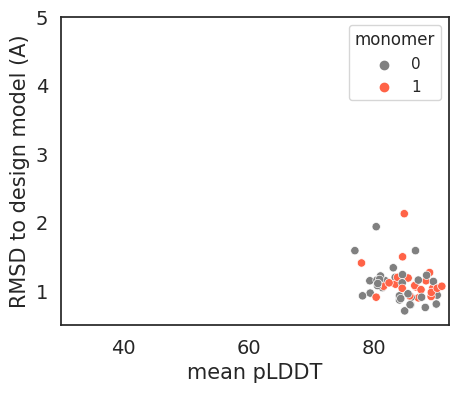

In [ ]:
sns.set(rc={'figure.figsize':(5,4)})
sns.set_style("white")
cols=['grey','tomato']
ax = sns.scatterplot(data=df, x="plDDT_backbone", y="RMS_ESM", hue="monomer", palette=cols)
ax.set_xlabel("mean pLDDT",fontsize=15)
ax.set_ylabel("RMSD to design model (A)",fontsize=15)
ax.tick_params(labelsize=14)
plt.ylim(0.5, 5)
plt.xlim(30, 92)

(0.3, 0.92)

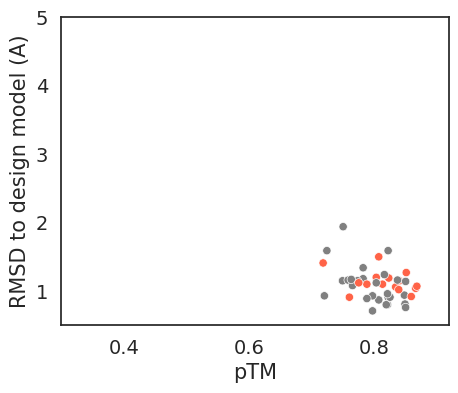

In [ ]:
sns.set(rc={'figure.figsize':(5,4)})
sns.set_style("white")
cols=['grey','tomato']
ax = sns.scatterplot(data=df5, x="ptm", y="RMS_ESM", hue="monomer", palette=cols, legend=False)
ax.set_xlabel("pTM",fontsize=15)
ax.set_ylabel("RMSD to design model (A)",fontsize=15)
ax.tick_params(labelsize=14)
plt.ylim(0.5, 5)
plt.xlim(0.30, 0.92)

(30.0, 92.0)

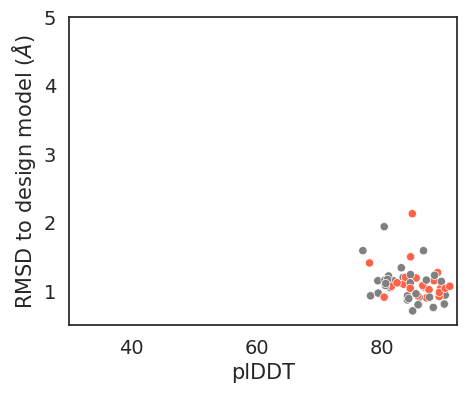

In [ ]:
sns.set(rc={'figure.figsize':(5,4)})
sns.set_style("white")
cols=['grey','tomato']
ax = sns.scatterplot(data=df5, x="plDDT_backbone", y="RMS_ESM", hue="monomer", palette=cols, legend=None)
ax.set_xlabel("plDDT",fontsize=15)
ax.set_ylabel("RMSD to design model ($\AA$)",fontsize=15)
ax.tick_params(labelsize=14)
plt.ylim(0.5, 5)
plt.xlim(30, 92)

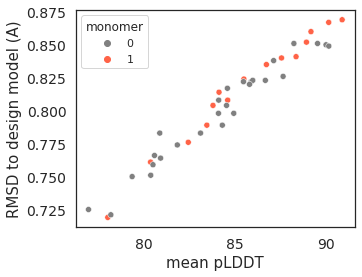

In [ ]:
sns.set(rc={'figure.figsize':(5,4)})
sns.set_style("white")
cols=['grey','tomato']
ax = sns.scatterplot(data=df5, x="plDDT_backbone", y="ptm", hue="monomer", palette=cols)
ax.set_xlabel("mean pLDDT",fontsize=15)
ax.set_ylabel("RMSD to design model (A)",fontsize=15)
ax.tick_params(labelsize=14)
#plt.ylim(0.5, 5)
#plt.xlim(30, 92)

In [ ]:
p_non_folded = dAF3_ss.loc[(dAF3_ss.monomer == 0), "plDDT"].values
p_folded = dAF3_ss.loc[(dAF3_ss.monomer == 1), "plDDT"].values

log_p_non_folded = np.log(p_non_folded)
log_p_folded = np.log(p_folded)

print("p_non_folded: ", normaltest(p_non_folded).pvalue)
print("p_folded: ", normaltest(p_folded).pvalue)
print()
print("Log(p_non_folded): ", normaltest(log_p_non_folded).pvalue)
print("Log(p_folded): ", normaltest(log_p_folded).pvalue)

p_non_folded:  7.957072364384554e-12
p_folded:  7.484545838370988e-09

Log(p_non_folded):  5.798496420075336e-18
Log(p_folded):  3.1354980609436903e-10


In [ ]:
r_non_folded = dAF_ss.loc[(dAF_ss.monomer == 0), "RMSD"].values
r_folded = dAF_ss.loc[(dAF_ss.monomer == 1), "RMSD"].values

log_r_non_folded = np.log(r_non_folded)
log_r_folded = np.log(r_folded)

print("r_non_folded: ", normaltest(r_non_folded).pvalue)
print("r_folded: ", normaltest(r_folded).pvalue)
print()
print("Log(r_non_folded): ", normaltest(log_r_non_folded).pvalue)
print("Log(r_folded): ", normaltest(log_r_folded).pvalue)
print()

r_non_folded:  4.319954285263546e-12
r_folded:  0.0034135908814644836

Log(r_non_folded):  0.035472706795219036
Log(r_folded):  0.9305184706039039



In [ ]:
p9_non_folded = dAF3_ss.loc[(dAF3_ss.monomer == 0), "plDDT_9"].values
p9_folded = dAF3_ss.loc[(dAF3_ss.monomer == 1), "plDDT_9"].values

log_p9_non_folded = np.log(p9_non_folded)
log_p9_folded = np.log(p9_folded)

print("p_non_folded: ", normaltest(p9_non_folded).pvalue)
print("p_folded: ", normaltest(p9_folded).pvalue)
print()
print("Log(p_non_folded): ", normaltest(log_p9_non_folded).pvalue)
print("Log(p_folded): ", normaltest(log_p9_folded).pvalue)

p_non_folded:  0.001482400484045047
p_folded:  0.011593887508036197

Log(p_non_folded):  3.9473141845306597e-10
Log(p_folded):  0.001724284118575656


In [ ]:
p81_non_folded = dAF3_ss.loc[(dAF3_ss.monomer == 0), "plDDT_81"].values
p81_folded = dAF3_ss.loc[(dAF3_ss.monomer == 1), "plDDT_81"].values

log_p81_non_folded = np.log(p81_non_folded)
log_p81_folded = np.log(p81_folded)

print("p_non_folded: ", normaltest(p81_non_folded).pvalue)
print("p_folded: ", normaltest(p81_folded).pvalue)
print()
print("Log(p_non_folded): ", normaltest(log_p81_non_folded).pvalue)
print("Log(p_folded): ", normaltest(log_p81_folded).pvalue)

p_non_folded:  7.465375789368676e-14
p_folded:  1.2147029090977787e-07

Log(p_non_folded):  1.8537529019922205e-24
Log(p_folded):  1.2134292958363595e-08


In [ ]:
p_non_folded_ESM = df_ss.loc[(df_ss.monomer == 0), "plDDT_backbone"].values
p_folded_ESM = df_ss.loc[(df_ss.monomer == 1), "plDDT_backbone"].values

log_p_non_folded_ESM = np.log(p_non_folded_ESM)
log_p_folded_ESM = np.log(p_folded_ESM)

print("p_non_folded_ESM: ", normaltest(p_non_folded_ESM).pvalue)
print("p_folded_ESM: ", normaltest(p_folded_ESM).pvalue)
print()
print("Log(p_non_folded_ESM): ", normaltest(log_p_non_folded_ESM).pvalue)
print("Log(p_folded_ESM): ", normaltest(log_p_folded_ESM).pvalue)

p_non_folded_ESM:  0.6587492461727777
p_folded_ESM:  0.7043642436384125

Log(p_non_folded_ESM):  0.6398351248715247
Log(p_folded_ESM):  0.6235475085341164


/usr/local/lib/python3.8/dist-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [ ]:
r_non_folded_ESM = df_ss.loc[(df_ss.monomer == 0), "RMS_ESM"].values
r_folded_ESM = df_ss.loc[(df_ss.monomer == 1), "RMS_ESM"].values

log_r_non_folded_ESM = np.log(r_non_folded_ESM)
log_r_folded_ESM = np.log(r_folded_ESM)

print("r_non_folded_ESM: ", normaltest(r_non_folded_ESM).pvalue)
print("r_folded_ESM: ", normaltest(r_folded_ESM).pvalue)
print()
print("Log(r_non_folded_ESM): ", normaltest(log_r_non_folded_ESM).pvalue)
print("Log(r_folded_ESM): ", normaltest(log_r_folded_ESM).pvalue)

r_non_folded_ESM:  0.0036447411186508486
r_folded_ESM:  0.2063602811435079

Log(r_non_folded_ESM):  0.27084547851808544
Log(r_folded_ESM):  0.5539807906630336


In [ ]:
t_non_folded_ESM = df5.loc[(df5.monomer == 0), "ptm"].values
t_folded_ESM = df5.loc[(df5.monomer == 1), "ptm"].values

log_t_non_folded_ESM = np.log(t_non_folded_ESM)
log_t_folded_ESM = np.log(t_folded_ESM)

print("t_non_folded_ESM: ", normaltest(t_non_folded_ESM).pvalue)
print("t_folded_ESM: ", normaltest(t_folded_ESM).pvalue)
print()
print("Log(t_non_folded_ESM): ", normaltest(log_t_non_folded_ESM).pvalue)
print("Log(t_folded_ESM): ", normaltest(log_t_folded_ESM).pvalue)

t_non_folded_ESM:  0.446200781666934
t_folded_ESM:  0.25218942484858703

Log(t_non_folded_ESM):  0.4223120446737447
Log(t_folded_ESM):  0.1538233819780815


In [ ]:
stat_results_AF_plDDT = [mannwhitneyu(p_non_folded, p_folded, alternative="two-sided")]
pvalues_AF_plDDT = [result.pvalue for result in stat_results_AF_plDDT]
print("non folded vs folded AlphaFold plDDT:", stat_results_AF_plDDT[0])

stat_results_AF_RMS = [mannwhitneyu(r_non_folded, r_folded, alternative="two-sided")]
pvalues_AF_RMS = [result.pvalue for result in stat_results_AF_RMS]
print("non folded vs folded RMSD AlphaFold prediction to design model:", stat_results_AF_RMS[0])

stat_results_AF_plDDT_9 = [mannwhitneyu(p9_non_folded, p9_folded, alternative="two-sided")]
pvalues_AF_plDDT_9 = [result.pvalue for result in stat_results_AF_plDDT_9]
print("non folded vs folded AlphaFold plDDT:", stat_results_AF_plDDT_9[0])

stat_results_AF_plDDT_81 = [mannwhitneyu(p81_non_folded, p81_folded, alternative="two-sided")]
pvalues_AF_plDDT_81 = [result.pvalue for result in stat_results_AF_plDDT_81]
print("non folded vs folded AlphaFold plDDT:", stat_results_AF_plDDT_81[0])

stat_results_ESM_plDDT = [mannwhitneyu(p_non_folded_ESM, p_folded_ESM, alternative="two-sided")]
pvalues_ESM_plDDT = [result.pvalue for result in stat_results_ESM_plDDT]
print("non folded vs folded ESMFold plDDT:", stat_results_ESM_plDDT[0])

stat_results_ESM_RMS = [mannwhitneyu(r_non_folded_ESM, r_folded_ESM, alternative="two-sided")]
pvalues_ESM_RMS = [result.pvalue for result in stat_results_ESM_RMS]
print("non folded vs folded RMSD ESMFold prediction to design model:", stat_results_ESM_RMS[0])

stat_results_AF_plDDT_perm = [permutation_test(p_non_folded, p_folded, 10000)]
print(f"Permutation test: p-value={stat_results_AF_plDDT_perm[0]:.10f}")

stat_results_AF_RMS_perm = [permutation_test(r_non_folded, r_folded, 10000)]
print(f"Permutation test: p-value={stat_results_AF_RMS_perm[0]:.10f}")

stat_results_ESM_plDDT_perm = [permutation_test(p_non_folded_ESM, p_folded_ESM, 10000)]
print(f"Permutation test: p-value={stat_results_ESM_plDDT_perm[0]:.10f}")

stat_results_ESM_RMS_perm = [permutation_test(r_non_folded_ESM, r_folded_ESM, 10000)]
print(f"Permutation test: p-value={stat_results_ESM_RMS_perm[0]:.10f}")

non folded vs folded AlphaFold plDDT: MannwhitneyuResult(statistic=2199.0, pvalue=1.1579321939207476e-11)
non folded vs folded RMSD AlphaFold prediction to design model: MannwhitneyuResult(statistic=6917.5, pvalue=1.1052686660978149e-05)
non folded vs folded AlphaFold plDDT: MannwhitneyuResult(statistic=3262.5, pvalue=2.0002938765843344e-05)
non folded vs folded AlphaFold plDDT: MannwhitneyuResult(statistic=1858.5, pvalue=3.1409092608656e-14)
non folded vs folded ESMFold plDDT: MannwhitneyuResult(statistic=160.0, pvalue=0.27024482631702895)
non folded vs folded RMSD ESMFold prediction to design model: MannwhitneyuResult(statistic=161.5, pvalue=0.28745216506530735)
Permutation test: p-value=0.0000000000
Permutation test: p-value=0.0000000000
Permutation test: p-value=0.2160000000
Permutation test: p-value=0.5110000000


In [ ]:
stat_results_ESM_TM = [mannwhitneyu(t_non_folded_ESM, t_folded_ESM, alternative="two-sided")]
pvalues_ESM_TM = [result.pvalue for result in stat_results_ESM_TM]
print("non folded vs folded RMSD ESMFold prediction to design model:", stat_results_ESM_TM[0])

stat_results_ESM_TM_perm = [permutation_test(t_non_folded_ESM, t_folded_ESM, 10000)]
print(f"Permutation test: p-value={stat_results_ESM_TM_perm[0]:.10f}")

non folded vs folded RMSD ESMFold prediction to design model: MannwhitneyuResult(statistic=141.5, pvalue=0.1121420429843547)
Permutation test: p-value=0.1469000000


In [ ]:
pip install statannotations

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install statsmodels

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from statannotations.Annotator import Annotator

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

0 vs. 1: Custom statistical test, P_val:1.158e-11


(30.0, 102.0)

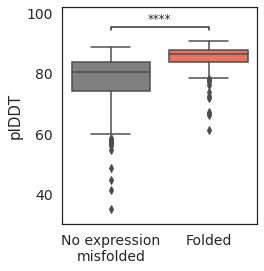

In [ ]:
# Putting the parameters in a dictionary avoids code duplication
# since we use the same for `sns.boxplot` and `Annotator` calls
sns.set(rc={'figure.figsize':(3.5,4)})
sns.set_style("white")
cols=['grey', 'tomato']

plotting_parameters = {
    'data':    dAF_ss,
    'x':       'monomer',
    'y':       'plDDT',
    'palette': cols,
}

pairs = [(0, 1)]

formatted_pvalues = [f"p={p:.2e}" for p in pvalues_AF_plDDT]

# Plot with seaborn
ax=sns.boxplot(**plotting_parameters)

# Add annotations
annotator = Annotator(ax, pairs, **plotting_parameters)
#annotator.set_custom_annotations(formatted_pvalues)
annotator.set_pvalues(pvalues_AF_plDDT)
annotator.annotate()

ax.set_xlabel("")
ax.set_ylabel("plDDT",fontsize=15)
ax.tick_params(labelsize=14)
ax.set_xticklabels(['No expression\nmisfolded', 'Folded'])
plt.ylim(30, 102)

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

0 vs. 1: Custom statistical test, P_val:1.105e-05


(0.5, 7.0)

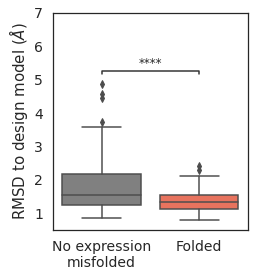

In [ ]:
sns.set(rc={'figure.figsize':(3.5,4)})
sns.set_style("white")
cols=['grey', 'tomato']

plotting_parameters = {
    'data':    dAF_ss,
    'x':       'monomer',
    'y':       'RMSD',
    'palette': cols,
}

pairs = [(0, 1)]

formatted_pvalues = [f"p={p:.2e}" for p in pvalues_AF_RMS]

# Plot with seaborn
ax=sns.boxplot(**plotting_parameters)

# Add annotations
annotator = Annotator(ax, pairs, **plotting_parameters)
#annotator.set_custom_annotations(formatted_pvalues)
annotator.set_pvalues(pvalues_AF_RMS)
annotator.annotate()

ax.set_xlabel("")
ax.set_ylabel("RMSD to design model ($\AA$)",fontsize=15)
ax.tick_params(labelsize=14)
ax.set_xticklabels(['No expression\nmisfolded', 'Folded'])
plt.ylim(0.5, 7.0)

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

0 vs. 1: Custom statistical test, P_val:2.702e-01


(30.0, 102.0)

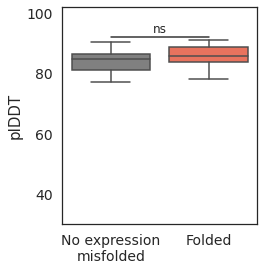

In [ ]:
sns.set(rc={'figure.figsize':(3.5,4)})
sns.set_style("white")
cols=['grey', 'tomato']

plotting_parameters = {
    'data':    df_ss,
    'x':       'monomer',
    'y':       'plDDT_backbone',
    'palette': cols,
}

pairs = [(0, 1)]

formatted_pvalues = [f"p={p:.2e}" for p in pvalues_ESM_plDDT]

# Plot with seaborn
ax=sns.boxplot(**plotting_parameters)

# Add annotations
annotator = Annotator(ax, pairs, **plotting_parameters)
#annotator.set_custom_annotations(formatted_pvalues)
annotator.set_pvalues(pvalues_ESM_plDDT)
annotator.annotate()

ax.set_xlabel("")
ax.set_ylabel("plDDT",fontsize=15)
ax.tick_params(labelsize=14)
ax.set_xticklabels(['No expression\nmisfolded', 'Folded'])
plt.ylim(30, 102)

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

0 vs. 1: Custom statistical test, P_val:2.875e-01


(0.5, 5.7)

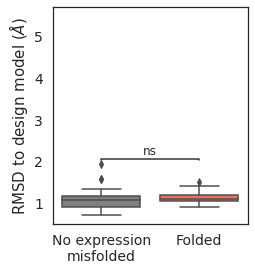

In [ ]:
sns.set(rc={'figure.figsize':(3.5,4)})
sns.set_style("white")
cols=['grey', 'tomato']

plotting_parameters = {
    'data':    df_ss,
    'x':       'monomer',
    'y':       'RMS_ESM',
    'palette': cols,
}

pairs = [(0, 1)]

formatted_pvalues = [f"p={p:.2e}" for p in pvalues_ESM_RMS]

# Plot with seaborn
ax=sns.boxplot(**plotting_parameters)

# Add annotations
annotator = Annotator(ax, pairs, **plotting_parameters)
#annotator.set_custom_annotations(formatted_pvalues)
annotator.set_pvalues(pvalues_ESM_RMS)
annotator.annotate()

ax.set_xlabel("")
ax.set_ylabel("RMSD to design model ($\AA$)",fontsize=15)
ax.tick_params(labelsize=14)
ax.set_xticklabels(['No expression\nmisfolded', 'Folded'])
plt.ylim(0.5, 5.7)

In [ ]:
dAF_picked=dAF_ss.loc[(dAF_ss["RMSD"] < 1.75)&(dAF_ss["plDDT"] > 85.0)]
dAF_picked

disulfide  expression  soluble  monomer      plDDT  RMSD
design   model                                                            
HBI_b_01 model_1          0           1        1        0  86.972072  0.94
HBI_b_07 model_1          0           1        1        1  87.519279  1.15
         model_2          0           1        1        1  87.192252  1.02
         model_3          0           1        1        1  86.334955  1.12
         model_4          0           1        1        1  86.293153  1.22
...                     ...         ...      ...      ...        ...   ...
HBI_b_50 model_2          0           1        1        1  86.267297  1.07
HBI_b_55 model_1         -1           1        1        0  86.168829  1.47
HBI_b_56 model_1          0           1        1        1  86.467928  1.32
         model_2          0           1        1        1  85.700541  1.32
         model_3          0           1        1        1  85.181802  1.36

[66 rows x 6 columns]

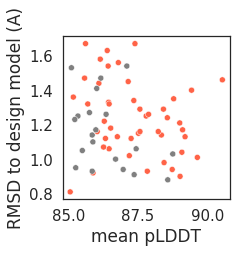

In [ ]:
sns.set(rc={'figure.figsize':(3,3)})
sns.set_style("white")
cols=['grey','tomato']
ax=sns.scatterplot(data=dAF_picked, x="plDDT", y="RMSD", hue="monomer", legend=False, palette=cols)

ax.set_xlabel("mean pLDDT",fontsize=17)
ax.set_ylabel("RMSD to design model (A)",fontsize=17)
ax.tick_params(labelsize=15)

In [ ]:
dscore = dAF_picked.groupby('design')['plDDT'].count()
#dscore=dscore.rename(columns={'plDDT':'counts'})
#dscore.columns=["counts"]
dscore = dAF_picked.groupby('design').agg({'plDDT':'count'})
dscore=dscore.rename(columns={'plDDT':'counts'})
dscore

,counts
design,
HBI_b_01,1
HBI_b_07,4
HBI_b_08,1
HBI_b_09,4
HBI_b_10,5
HBI_b_14,5
HBI_b_15,3
HBI_b_19,2
HBI_b_21,2


In [ ]:
dAF_score = dAF_F.join(dscore, how="outer")
dAF_score=dAF_score.fillna(0)
dAF_score

disulfide  expression  soluble  monomer      plDDT  RMSD  \
design   model                                                               
HBI_b_01 model_1          0           1        1        0  86.972072  0.94   
         model_2          0           1        1        0  84.004324  1.04   
         model_3          0           1        1        0  79.158829  1.44   
         model_4          0           1        1        0  76.187568  1.31   
         model_5          0           1        1        0  58.362883  2.05   
...                     ...         ...      ...      ...        ...   ...   
HBI_b_56 model_1          0           1        1        1  86.467928  1.32   
         model_2          0           1        1        1  85.700541  1.32   
         model_3          0           1        1        1  85.181802  1.36   
         model_4          0           1        1        1  83.709730  1.50   
         model_5          0           1        1        1  82.764054  1.50   

                  counts  
design   model            
HBI_b_01 model_1     1.0  
         model_2     1.0  
         model_3     1.0  
         model_4     1.0  
         model_5     1.0  
...                  ...  
HBI_b_56 model_1     3.0  
         model_2     3.0  
         model_3     3.0  
         model_4     3.0  
         model_5     3.0  

[280 rows x 7 columns]

In [ ]:
dAF_score_ss = dAF_score.loc[dAF_score["disulfide"].isin([0,-1])]
dAF_score_ss

disulfide  expression  soluble  monomer      plDDT  RMSD  \
design   model                                                               
HBI_b_01 model_1          0           1        1        0  86.972072  0.94   
         model_2          0           1        1        0  84.004324  1.04   
         model_3          0           1        1        0  79.158829  1.44   
         model_4          0           1        1        0  76.187568  1.31   
         model_5          0           1        1        0  58.362883  2.05   
...                     ...         ...      ...      ...        ...   ...   
HBI_b_56 model_1          0           1        1        1  86.467928  1.32   
         model_2          0           1        1        1  85.700541  1.32   
         model_3          0           1        1        1  85.181802  1.36   
         model_4          0           1        1        1  83.709730  1.50   
         model_5          0           1        1        1  82.764054  1.50   

                  counts  
design   model            
HBI_b_01 model_1     1.0  
         model_2     1.0  
         model_3     1.0  
         model_4     1.0  
         model_5     1.0  
...                  ...  
HBI_b_56 model_1     3.0  
         model_2     3.0  
         model_3     3.0  
         model_4     3.0  
         model_5     3.0  

[210 rows x 7 columns]

[Text(0, 0, 'failed designs'), Text(1, 0, 'monomeric')]

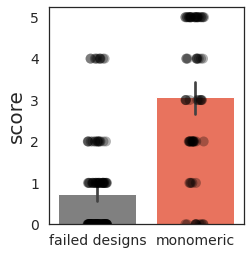

In [ ]:
sns.set(rc={'figure.figsize':(3.5,4)})
sns.set_style("white")
cols=['grey', 'tomato']
ax=sns.barplot(data=dAF_score_ss, x='monomer', y='counts', palette=cols)
sns.stripplot(x = "monomer",y = "counts",data = dAF_score_ss, color="black",alpha = 0.3,size=10,ax=ax)
ax.set_xlabel("")
ax.set_ylabel("score",fontsize=20)
ax.tick_params(labelsize=14)
ax.set_xticklabels(['failed designs', 'monomeric'])

[Text(0, 0, 'No expression\nmisfolded'), Text(1, 0, 'Folded')]

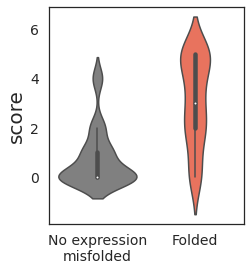

In [ ]:
sns.set(rc={'figure.figsize':(3.5,4)})
sns.set_style("white")
cols=['grey', 'tomato']
ax=sns.violinplot(data=dAF_score_ss, x='monomer', y='counts', palette=cols)
#sns.stripplot(x = "monomer",y = "counts",data = dAF_score_ss, color="black",alpha = 0.3,size=10,ax=ax)
ax.set_xlabel("")
ax.set_ylabel("score",fontsize=20)
ax.tick_params(labelsize=14)
ax.set_xticklabels(['No expression\nmisfolded', 'Folded'])

In [ ]:
dESM_picked=df_ss.loc[(df_ss["RMS_ESM"] < 1.75)&(df_ss["plDDT_backbone"] > 85.0)]
dESM_picked

,model_1,model_2,model_3,model_4,model_5,RMS_model_1,RMS_model_2,RMS_model_3,RMS_model_4,RMS_model_5,plDDT_all,plDDT_backbone,RMS_ESM,disulfide,expression,soluble,monomer
HBI_b_01,86.972072,84.004324,79.158829,76.187568,58.362883,0.94,1.04,1.44,1.31,2.05,85.994724,90.006611,0.81,0,1,1,0
HBI_b_03,80.006847,76.458378,57.854955,57.199099,54.645676,1.97,2.78,2.63,2.94,2.08,82.192151,86.678911,1.59,0,1,1,0
HBI_b_07,87.519279,87.192252,86.334955,86.293153,84.592883,1.15,1.02,1.12,1.22,1.11,84.568971,88.363591,1.15,0,1,1,1
HBI_b_10,89.195495,88.344595,88.232162,87.575856,86.039279,1.13,1.14,1.16,1.16,1.16,83.202978,86.736888,1.06,0,1,1,1
HBI_b_20,84.182432,81.863784,81.413604,80.136486,79.879279,1.23,1.86,1.55,1.68,1.68,81.810697,85.900479,0.80,0,0,0,0
HBI_b_17,83.960541,79.428108,75.086937,74.955586,74.933243,1.22,1.41,1.41,1.55,1.42,85.662148,90.159134,0.94,0,0,0,0
HBI_b_22,90.535676,88.558739,87.257027,86.762613,86.523153,1.46,1.24,1.12,1.13,1.18,84.857200,89.181400,0.92,0,1,1,1
HBI_b_26,89.106577,89.081171,89.003604,88.419369,87.797928,1.17,1.04,1.21,1.29,1.25,84.756750,88.933738,1.27,0,1,1,1
HBI_b_23,87.438288,85.234595,83.100450,80.225135,77.180180,1.06,1.23,1.27,1.43,1.65,81.640141,85.987845,0.91,-1,0,0,0
HBI_b_34,78.915946,78.608649,77.987838,76.019910,66.092973,1.81,1.53,1.79,1.70,2.43,81.729061,85.502099,1.19,-1,1,1,1


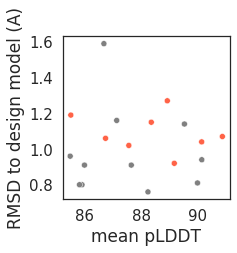

In [ ]:
sns.set(rc={'figure.figsize':(3,3)})
sns.set_style("white")
cols=['grey','tomato']
ax=sns.scatterplot(data=dESM_picked, x="plDDT_backbone", y="RMS_ESM", hue="monomer", legend=False, palette=cols)

ax.set_xlabel("mean pLDDT",fontsize=17)
ax.set_ylabel("RMSD to design model (A)",fontsize=17)
ax.tick_params(labelsize=15)

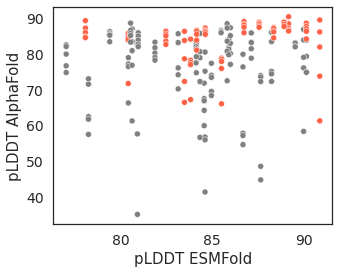

In [ ]:
sns.set(rc={'figure.figsize':(5,4)})
sns.set_style("white")
cols=['grey','tomato']
ax = sns.scatterplot(data=df_ss, x="plDDT_backbone", y="model_1", hue="monomer", palette=cols, legend=None)
sns.scatterplot(data=df_ss, x="plDDT_backbone", y="model_2", hue="monomer", palette=cols, ax=ax, legend=None)
sns.scatterplot(data=df_ss, x="plDDT_backbone", y="model_3", hue="monomer", palette=cols, ax=ax, legend=None)
sns.scatterplot(data=df_ss, x="plDDT_backbone", y="model_4", hue="monomer", palette=cols, ax=ax, legend=None)
sns.scatterplot(data=df_ss, x="plDDT_backbone", y="model_5", hue="monomer", palette=cols, ax=ax, legend=None)
ax.set_xlabel("pLDDT ESMFold",fontsize=15)
ax.set_ylabel("pLDDT AlphaFold",fontsize=15)
ax.tick_params(labelsize=14)



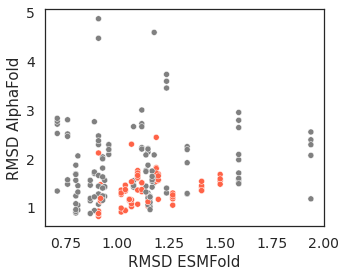

In [ ]:
sns.set(rc={'figure.figsize':(5,4)})
sns.set_style("white")
cols=['grey','tomato']
ax = sns.scatterplot(data=df_ss, x="RMS_ESM", y="RMS_model_1", hue="monomer", palette=cols, legend=None)
sns.scatterplot(data=df_ss, x="RMS_ESM", y="RMS_model_2", hue="monomer", palette=cols, ax=ax, legend=None)
sns.scatterplot(data=df_ss, x="RMS_ESM", y="RMS_model_3", hue="monomer", palette=cols, ax=ax, legend=None)
sns.scatterplot(data=df_ss, x="RMS_ESM", y="RMS_model_4", hue="monomer", palette=cols, ax=ax, legend=None)
sns.scatterplot(data=df_ss, x="RMS_ESM", y="RMS_model_5", hue="monomer", palette=cols, ax=ax, legend=None)
ax.set_xlabel("RMSD ESMFold",fontsize=15)
ax.set_ylabel("RMSD AlphaFold",fontsize=15)
ax.tick_params(labelsize=14)



In [ ]:
import pandas as pd
import pickle

# Load data from the pickle file
with open('/content/drive/MyDrive/AF_vs_ESMF/ESMFold_masking/AF48_best_rmsd.pkl', 'rb') as f:
    data = pickle.load(f)

# Convert the data to a DataFrame
df = pd.DataFrame(data)

# Specify the file path and name for the CSV file
csv_file_path = '/content/drive/MyDrive/AF_vs_ESMF/ESMFold_masking/AF48_best_rmsd.csv'

# Export the DataFrame to CSV
df.to_csv(csv_file_path)

print("Data exported successfully from pickle to CSV.")

Data exported successfully from pickle to CSV.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
